In [1]:
import numpy as np
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from PIL import Image
import numpy as np
from IPython.display import display
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
from sklearn.manifold import Isomap
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

In [3]:
df = pd.read_csv('2021.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026383 entries, 0 to 1026382
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1026383 non-null  object 
 1   kprq            1026383 non-null  object 
 2   fpdm            1026383 non-null  int64  
 3   fphm            1026383 non-null  int64  
 4   fpzt            1026383 non-null  int64  
 5   xfsh            1026383 non-null  object 
 6   xfmc            1026383 non-null  object 
 7   gfsh            1026383 non-null  object 
 8   gfmc            1026383 non-null  object 
 9   spbm            1009802 non-null  float64
 10  mc              1026383 non-null  object 
 11  hw_and_nw_name  1002053 non-null  object 
 12  ggxh            672610 non-null   object 
 13  dw              842353 non-null   object 
 14  sl              899772 non-null   float64
 15  dj              999480 non-null   float64
 16  je              1026383 non-null  fl

In [5]:
df.describe()

,fpdm,fphm,fpzt,spbm,sl,dj,je,slv,se
count,1.026383e+06,1.026383e+06,1.026383e+06,1.009802e+06,8.997720e+05,9.994800e+05,1.026383e+06,1.026337e+06,1.026383e+06
mean,1.312909e+10,2.535081e+07,8.468379e-02,1.539867e+18,3.381387e+04,1.205892e+04,6.225820e+04,1.043463e-01,7.292733e+03
std,1.605586e+10,2.252272e+07,4.027361e-01,8.565500e+17,1.224610e+06,9.322022e+05,4.800824e+07,4.396797e-02,6.241044e+06
min,1.100134e+09,4.190000e+02,0.000000e+00,1.050700e+10,-7.915600e+06,-5.240000e+01,-1.299817e+10,0.000000e+00,-1.689762e+09
25%,4.400212e+09,8.772130e+06,0.000000e+00,1.090245e+18,1.000000e+00,2.209548e+00,2.300900e+02,6.000000e-02,1.129000e+01
50%,4.403211e+09,1.915632e+07,0.000000e+00,1.090517e+18,4.800000e+01,3.800000e+01,2.610620e+03,1.300000e-01,2.228600e+02
75%,1.200200e+10,3.540474e+07,0.000000e+00,1.100101e+18,1.000000e+03,2.720000e+02,3.300913e+04,1.300000e-01,3.449070e+03
max,9.800183e+10,9.999900e+07,2.000000e+00,6.130000e+18,9.863360e+08,1.655586e+08,1.299917e+10,1.700000e-01,1.689892e+09


In [6]:
df.isnull().sum()

id                     0
kprq                   0
fpdm                   0
fphm                   0
fpzt                   0
xfsh                   0
xfmc                   0
gfsh                   0
gfmc                   0
spbm               16581
mc                     0
hw_and_nw_name     24330
ggxh              353773
dw                184030
sl                126611
dj                 26903
je                     0
slv                   46
se                     0
dtype: int64

In [7]:
df_del = df.dropna(axis=0,
          how='any',
          thresh=None,
          subset=['spbm','hw_and_nw_name'],
          inplace=False)

In [8]:
df_del.isnull().sum()

id                     0
kprq                   0
fpdm                   0
fphm                   0
fpzt                   0
xfsh                   0
xfmc                   0
gfsh                   0
gfmc                   0
spbm                   0
mc                     0
hw_and_nw_name         0
ggxh              336055
dw                171837
sl                115107
dj                 26051
je                     0
slv                    0
se                     0
dtype: int64

In [9]:
find_index=df_del[(df_del.fpzt==1)].index.tolist()
find_index_1=df_del[(df_del.fpzt==2)].index.tolist()
find_index_2=df_del[(df_del.fpzt==3)].index.tolist()
find_index_3=df_del[(df_del.fpzt==4)].index.tolist()

df_1 = df.drop(find_index)
df_2 = df_1.drop(find_index_1)
df_3 = df_2.drop(find_index_2)
df_pro = df_3.drop(find_index_3)


In [10]:
df_pro.columns

Index(['id', 'kprq', 'fpdm', 'fphm', 'fpzt', 'xfsh', 'xfmc', 'gfsh', 'gfmc',
       'spbm', 'mc', 'hw_and_nw_name', 'ggxh', 'dw', 'sl', 'dj', 'je', 'slv',
       'se'],
      dtype='object')

In [41]:
df_del2 = df_pro.drop(['id', 'xfmc', 'hw_and_nw_name', 'mc','dw'], axis = 1)

In [42]:
df_new = df_del2.drop(['fpdm', 'fphm', 'fpzt', 'spbm', 'ggxh', 'slv', 'se', 'xfsh'], axis = 1)

In [43]:
df_new

,kprq,gfsh,gfmc,sl,dj,je
1,2021-05-19 00:00:00,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
2,2021-05-19 00:00:00,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
3,2021-05-19 00:00:00,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
4,2021-05-19 00:00:00,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
5,2021-05-19 00:00:00,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
...,...,...,...,...,...,...
1026376,2021-04-23 00:00:00,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,649.504950,649.50
1026379,2021-07-18 00:00:00,91440300192230969A,深圳市中电电力技术股份有限公司,2.0,438.679245,877.36
1026380,2021-08-30 00:00:00,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,303.960396,303.96
1026381,2021-03-20 00:00:00,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,926.732673,926.73


In [44]:
df_new['kprq'] = pd.to_datetime(df_new.kprq, format='%Y-%m-%d %H:%M:%S')

df_new['kprq'].max()

Timestamp('2021-12-31 00:00:00')

In [45]:
df_new['kprq'].min()

Timestamp('2021-01-01 00:00:00')

e:\ProgramsInstalled\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


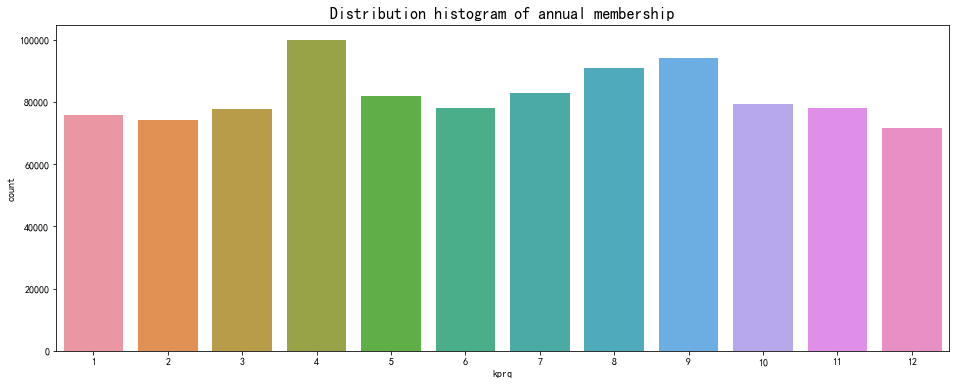

In [46]:
plt.figure(figsize=(16, 6))
sns.countplot(df_new['kprq'].dt.month)
plt.title('Distribution histogram of annual membership', fontsize=16, weight='bold')
plt.show()

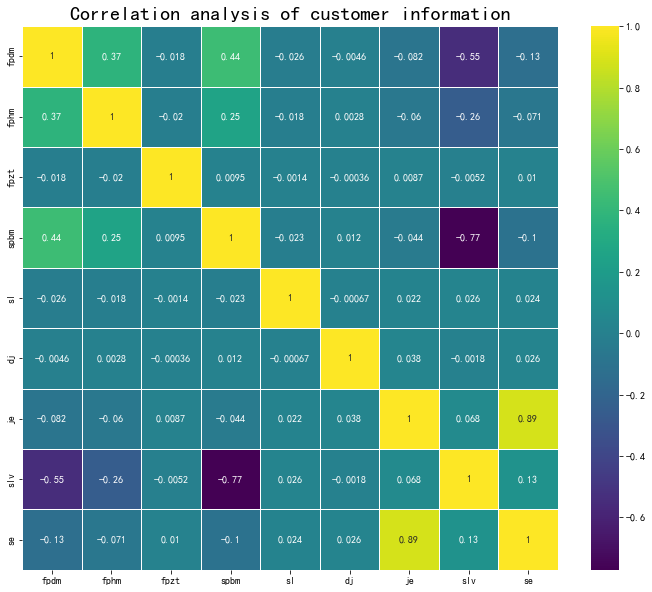

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_pro.corr(),annot=True,cmap='viridis',linewidths=.5)
plt.title('Correlation analysis of customer information', fontsize=20)
plt.show()

### 客户群

In [56]:
df_new2 = df_new[df_new["gfsh"] != "000000000000000"]
df_new2

,kprq,gfsh,gfmc,sl,dj,je
1,2021-05-19,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
2,2021-05-19,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
3,2021-05-19,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
4,2021-05-19,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
5,2021-05-19,9111000010000624XE,中国电子器材有限公司,12.0,7964.601770,95575.22
...,...,...,...,...,...,...
1026376,2021-04-23,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,649.504950,649.50
1026379,2021-07-18,91440300192230969A,深圳市中电电力技术股份有限公司,2.0,438.679245,877.36
1026380,2021-08-30,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,303.960396,303.96
1026381,2021-03-20,91440300192230969A,深圳市中电电力技术股份有限公司,1.0,926.732673,926.73


In [57]:
now = dt.datetime(2022,1,1)

rfmTable = df_new2.groupby('gfsh').agg({'kprq': lambda x: (now - x.max()).days,'je': lambda x: x.sum()})
rfmTable['kprq']= rfmTable['kprq'].astype(int)
print(type(rfmTable))
rfmTable

<class 'pandas.core.frame.DataFrame'>


,kprq,je
gfsh,,
000011000000000,12,3344132.84
11010240001708X,30,4557.05
110102K00001295,47,10742.54
110105196306056139,211,2411422.11
110105197504175416,92,2442262.92
...,...,...
L1SB49202400000,52,174505.39
L4301050041881099Q,172,489.20
Q9943010500405590G,272,146.90


In [58]:
rfmTable2= df_new2.groupby('gfsh').agg({'kprq': lambda x: len(x)})
rfmTable2

,kprq
gfsh,
000011000000000,25
11010240001708X,3
110102K00001295,5
110105196306056139,1
110105197504175416,1
...,...
L1SB49202400000,1
L4301050041881099Q,3
Q9943010500405590G,2


In [21]:
df_final=pd.merge(rfmTable,rfmTable2,on="gfsh")
df_final.rename(columns={"kprq_x":"Recency","kprq_y":"Frequency","je":"Monetary"},inplace=True)
df_final

,Recency,Monetary,Frequency
gfsh,,,
000011000000000,12,3344132.84,25
11010240001708X,30,4557.05,3
110102K00001295,47,10742.54,5
110105196306056139,211,2411422.11,1
110105197504175416,92,2442262.92,1
...,...,...,...
L1SB49202400000,52,174505.39,1
L4301050041881099Q,172,489.20,3
Q9943010500405590G,272,146.90,2


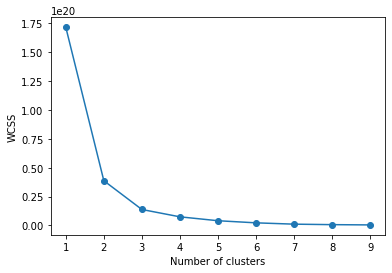

In [22]:
#create append
wcss = [] 
#for loop for i in range(start cluster, end cluster)
for i in range(1, 10): 
    #apply kmeans
    kmeans = KMeans(n_clusters = i, init = 'k-means++') 
    kmeans.fit(df_final) 
    wcss.append(kmeans.inertia_)
#plot graph
plt.plot(range(1, 10), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [23]:
from sklearn.cluster import KMeans 
k = 4
kmodel = KMeans(n_clusters = k, random_state=123,init="k-means++") 
kmodel.fit(df_final) #训练模型
cluster_center = pd.DataFrame(kmodel.cluster_centers_,columns=df_final.columns) 
cluster_center.index = pd.Series(kmodel.labels_ ).drop_duplicates().values
cluster_count = pd.Series(kmodel.labels_ ).value_counts()
cluster_count.name = "count"
cluster_center = pd.concat([cluster_center,cluster_count],axis=1)
cluster_center.index = ["客户群"+str(i + 1) for i in cluster_center.index]
cluster_center.sort_index(inplace=True)
cluster_center

,Recency,Monetary,Frequency,count
客户群1,130.202936,9.868750e+05,19.458798,17572
客户群2,10.600000,2.219102e+09,18040.600000,2
客户群3,25.838710,4.647201e+08,9720.193548,31
客户群4,1.000000,8.151299e+09,109100.500000,5


In [24]:
# 分配独立属性分层（查询需要导出excel表）
# 使用中位数判定，如果要判定新客户在哪个分层，可将新客户数据加入excel表并再次分析
# 判定标准：RFMScore数值越小客户越优质
# Recency: 上次购买距离时间   Monetary：购买总金额	Frequency：购买频次
quantiles = df_final.quantile(q=0.5)
print(quantiles)
segmented_rfm = df_final
def RScore(x,p,d):
    if x <= d[p]:
        return 1
    else:
        return 2   
def FMScore(x,p,d):
    if x <= d[p]:
        return 2
    else:
        return 1
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,)) 
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmented_rfm.head()

Recency        103.000
Monetary     21521.335
Frequency        2.000
Name: 0.5, dtype: float64


,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile
gfsh,,,,,,
000011000000000,12,3344132.84,25,1,1,1
11010240001708X,30,4557.05,3,1,1,2
110102K00001295,47,10742.54,5,1,1,2
110105196306056139,211,2411422.11,1,2,2,1
110105197504175416,92,2442262.92,1,1,2,1


In [25]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

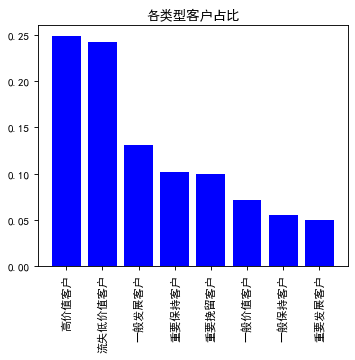

In [26]:
result=pd.DataFrame(segmented_rfm['RFMScore'].value_counts())
result["RFM"]=result.index
result.rename(columns={"RFMScore":"count"},inplace=True)
RFM_mapping = {"111":"高价值客户","121":"重要发展客户","211":"重要保持客户","221":"重要挽留客户","112":"一般价值客户",
               "122":"一般发展客户","212":"一般保持客户","222":"流失低价值客户"}
result["RFM"] = result["RFM"].map(RFM_mapping)
#使图像正常显示中文字符
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(5,4),dpi=80)
plt.bar(x=result["RFM"].values,height=result["count"].values/sum(result["count"].values),color='blue',width=0.8)
plt.xticks(color='black',rotation=90)
plt.title("各类型客户占比")
plt.show()

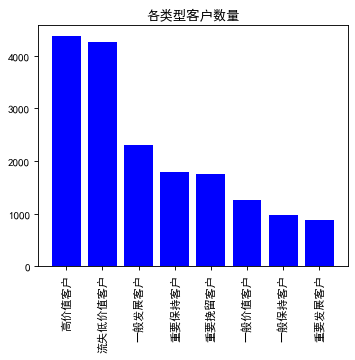

In [27]:
result=pd.DataFrame(segmented_rfm['RFMScore'].value_counts())
result["RFM"]=result.index
result.rename(columns={"RFMScore":"count"},inplace=True)
RFM_mapping = {"111":"高价值客户","121":"重要发展客户","211":"重要保持客户","221":"重要挽留客户","112":"一般价值客户",
               "122":"一般发展客户","212":"一般保持客户","222":"流失低价值客户"}
result["RFM"] = result["RFM"].map(RFM_mapping)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(5,4),dpi=80)
plt.bar(x=result["RFM"].values,height=result["count"].values,color='blue',width=0.8)
plt.xticks(color='black',rotation=90)
plt.title("各类型客户数量")
plt.show()

In [40]:
segmented_rfm1 = segmented_rfm.drop(['r_quartile', 'f_quartile', 'm_quartile'], axis = 1)
segmented_rfm1['gfsh'] = segmented_rfm1.index


segmented_rfm1 = segmented_rfm1.reset_index(drop= True)
RFM_mapping = {"111":"高价值客户","121":"重要发展客户","211":"重要保持客户","221":"重要挽留客户","112":"一般价值客户",
               "122":"一般发展客户","212":"一般保持客户","222":"流失低价值客户"}
segmented_rfm1["RFMScore"] = segmented_rfm1["RFMScore"].map(RFM_mapping)
segmented_rfm1.to_excel("2.xls", index=False)
segmented_rfm1

C:\Users\annab\AppData\Local\Temp/ipykernel_61420/2721749890.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  segmented_rfm1.to_excel("2.xls", index=False)


,Recency,Monetary,Frequency,RFMScore,gfsh
0,12,3344132.84,25,高价值客户,000011000000000
1,30,4557.05,3,一般价值客户,11010240001708X
2,47,10742.54,5,一般价值客户,110102K00001295
3,211,2411422.11,1,重要挽留客户,110105196306056139
4,92,2442262.92,1,重要发展客户,110105197504175416
...,...,...,...,...,...
17605,52,174505.39,1,重要发展客户,L1SB49202400000
17606,172,489.20,3,一般保持客户,L4301050041881099Q
17607,272,146.90,2,流失低价值客户,Q9943010500405590G
17608,347,32926.74,8,重要保持客户,Y1110000735110008G


In [29]:
import matplotlib    
print(matplotlib.matplotlib_fname())

e:\ProgramsInstalled\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [30]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

In [31]:
num_clusters = 3 

km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40,init='k-means++',n_jobs=-1)
result = km_cluster.fit_predict(np.array(df_final.Recency).reshape(-1,1))
cluster_cut = pd.DataFrame({'Data':np.array(df_final.Recency),"Categories":result})
cluster_cut.head()

e:\ProgramsInstalled\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,Data,Categories
0,12,1
1,30,1
2,47,1
3,211,2
4,92,1


### 供应商

In [32]:
df_xfsh = df_del2.drop(['fpdm', 'fphm', 'fpzt', 'spbm', 'ggxh', 'slv', 'se', 'gfsh'], axis = 1)

df_xfsh['kprq'] = pd.to_datetime(df_new.kprq, format='%Y-%m-%d %H:%M:%S')

In [33]:
now = dt.datetime(2022,1,1)

rfmTable = df_xfsh.groupby('xfsh').agg({'kprq': lambda x: (now - x.max()).days,'je': lambda x: x.sum()})
rfmTable['kprq']= rfmTable['kprq'].astype(int)
rfmTable

,kprq,je
xfsh,,
11008121DKD0028,24,58800.00
11010100DK01021,101,60445.55
11010100DK01099,8,5366.34
11010100DK01101,248,75247.52
11010100DK09322,95,74767.33
...,...,...
J1440304MH00000N07,9,7614.72
L110101WT100000,165,118811.88
L110108WT100000,211,3932.87


In [34]:
rfmTable2= df_xfsh.groupby('xfsh').agg({'kprq': lambda x: len(x)})
rfmTable2

,kprq
xfsh,
11008121DKD0028,6
11010100DK01021,3
11010100DK01099,5
11010100DK01101,1
11010100DK09322,4
...,...
J1440304MH00000N07,16
L110101WT100000,4
L110108WT100000,1


In [35]:
df_xfshf=pd.merge(rfmTable,rfmTable2,on="xfsh")
df_xfshf.rename(columns={"kprq_x":"Recency","kprq_y":"Frequency","je":"Monetary"},inplace=True)
df_xfshf

,Recency,Monetary,Frequency
xfsh,,,
11008121DKD0028,24,58800.00,6
11010100DK01021,101,60445.55,3
11010100DK01099,8,5366.34,5
11010100DK01101,248,75247.52,1
11010100DK09322,95,74767.33,4
...,...,...,...
J1440304MH00000N07,9,7614.72,16
L110101WT100000,165,118811.88,4
L110108WT100000,211,3932.87,1


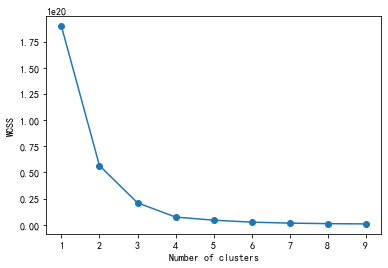

In [36]:
#create append
wcss = [] 
#for loop for i in range(start cluster, end cluster)
for i in range(1, 10): 
    #apply kmeans
    kmeans = KMeans(n_clusters = i, init = 'k-means++') 
    kmeans.fit(df_xfshf) 
    wcss.append(kmeans.inertia_)
#plot graph
plt.plot(range(1, 10), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [37]:
from sklearn.cluster import KMeans 
k = 4
kmodel = KMeans(n_clusters = k, random_state=123,init="k-means++") 
kmodel.fit(df_xfshf) #训练模型
cluster_center = pd.DataFrame(kmodel.cluster_centers_,columns=df_xfshf.columns) 
cluster_center.index = pd.Series(kmodel.labels_ ).drop_duplicates().values
cluster_count = pd.Series(kmodel.labels_ ).value_counts()
cluster_count.name = "count"
cluster_center = pd.concat([cluster_center,cluster_count],axis=1)
cluster_center.index = ["客户群"+str(i + 1) for i in cluster_center.index]
cluster_center.sort_index(inplace=True)
cluster_center

,Recency,Monetary,Frequency,count
客户群1,155.001638,5.654372e+05,16.615901,43947
客户群2,5.000000,1.512991e+09,12241.090909,2
客户群3,1.000000,1.068194e+10,70370.000000,1
客户群4,1.000000,4.667033e+09,24468.500000,11


In [38]:
df_xfshf['Frequency'].min()
df_xfshf['Frequency'].max()

70370

In [39]:
df_xfshf1 = df_xfshf.sort_values(by="Frequency", ascending=False)
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_xfshf1, x = "xfsh", y = "Frequency")
plt.title('Distribution of purchasing frequency', fontsize=16, weight='bold')
plt.show()

KeyboardInterrupt: 

In [ ]:
df_xfshf1  

,Recency,Monetary,Frequency
xfsh,,,
91440300311666571Q,1,1.068194e+10,70370
91440300192230969A,1,8.350409e+08,43215
91440300617439689Q,1,4.675180e+09,29380
91441900584734381E,4,1.664968e+09,25104
91440400MA52KTCL4Y,1,7.773119e+08,21481
...,...,...,...
914401156187857945,172,6.830200e+02,1
9144011558764359X4,98,1.396000e+02,1
9144011555440594X7,136,1.208850e+03,1


In [ ]:
# 分配独立属性分层（查询需要导出excel表）
# 使用中位数判定，如果要判定新客户在哪个分层，可将新客户数据加入excel表并再次分析
# 判定标准：RFMScore数值越小客户越优质
quantiles = df_xfshf.quantile(q=0.75)
print(quantiles)
segmented_rfm = df_xfshf
def RScore(x,p,d):
    if x <= d[p]:
        return 1
    else:
        return 2   
def FMScore(x,p,d):
    if x <= d[p]:
        return 2
    else:
        return 1
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,)) 
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmented_rfm.head()

Recency        246.00
Monetary      2953.78
Frequency        3.00
r_quartile       2.00
f_quartile       2.00
m_quartile       2.00
Name: 0.75, dtype: float64


,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile,RFMScore
xfsh,,,,,,,
11008121DKD0028,24,58800.00,6,1,1,1,111
11010100DK01021,101,60445.55,3,1,2,1,121
11010100DK01099,8,5366.34,5,1,1,1,111
11010100DK01101,248,75247.52,1,2,2,1,221
11010100DK09322,95,74767.33,4,1,1,1,111


In [ ]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm

,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile,RFMScore
xfsh,,,,,,,
11008121DKD0028,24,58800.00,6,1,1,1,111
11010100DK01021,101,60445.55,3,1,2,1,121
11010100DK01099,8,5366.34,5,1,1,1,111
11010100DK01101,248,75247.52,1,2,2,1,221
11010100DK09322,95,74767.33,4,1,1,1,111
...,...,...,...,...,...,...,...
J1440304MH00000N07,9,7614.72,16,1,1,1,111
L110101WT100000,165,118811.88,4,1,1,1,111
L110108WT100000,211,3932.87,1,1,2,1,121


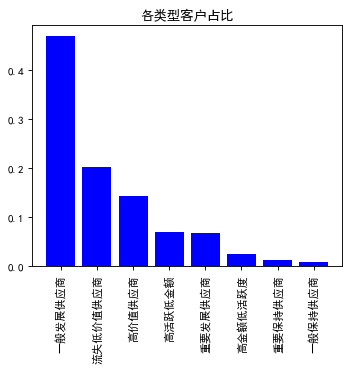

In [ ]:
result=pd.DataFrame(segmented_rfm['RFMScore'].value_counts())
result["RFM"]=result.index
result.rename(columns={"RFMScore":"count"},inplace=True)
RFM_mapping = {"111":"高价值供应商","121":"重要发展供应商","211":"重要保持供应商","221":"高金额低活跃度","112":"高活跃低金额",
               "122":"一般发展供应商","212":"一般保持供应商","222":"流失低价值供应商"}
result["RFM"] = result["RFM"].map(RFM_mapping)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(5,4),dpi=80)
plt.bar(x=result["RFM"].values,height=result["count"].values/sum(result["count"].values),color='blue',width=0.8)
plt.xticks(color='black',rotation=90)
plt.title("各类型客户占比")
plt.show()

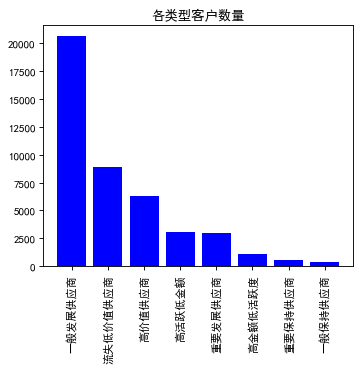

In [ ]:
result=pd.DataFrame(segmented_rfm['RFMScore'].value_counts())
result["RFM"]=result.index
result.rename(columns={"RFMScore":"count"},inplace=True)
RFM_mapping = {"111":"高价值供应商","121":"重要发展供应商","211":"重要保持供应商","221":"高金额低活跃度","112":"高活跃低金额",
               "122":"一般发展供应商","212":"一般保持供应商","222":"流失低价值供应商"}
result["RFM"] = result["RFM"].map(RFM_mapping)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(5,4),dpi=80)
plt.bar(x=result["RFM"].values,height=result["count"].values,color='blue',width=0.8)
plt.xticks(color='black',rotation=90)
plt.title("各类型客户数量")
plt.show()